In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
protected_attributes = ['age', 'sex', 'marital_status', 'own_telephone', 'employment']
n = len(protected_attributes)

In [3]:
root_dir = '/home/dhasade/audits/ml-audits/results/multicolab'

In [4]:
strategy = 'aposteriori'
agentwise_dps = [[] for _ in range(n)]
for base_agent in range(n):
    attr = protected_attributes[base_agent]

    all_files = os.listdir(root_dir)

    base_agent_files = [f for f in all_files if attr in f]

    for k in range(2, n+1):

        files_k = [f for f in base_agent_files if f'n{k}' in f and strategy in f]
        print(f'Number of files: {len(files_k)} for k={k} and attr={attr}')

        ds_k = []
        for f in files_k:
            df = pd.read_csv(os.path.join(root_dir, f))
            dp = df[df['attribute'] == attr]['dp_error'].mean()
            # print(dp)
            ds_k.append(dp)
        
        agentwise_dps[base_agent].append(np.mean(ds_k))
aposteriori_dps = agentwise_dps

Number of files: 4 for k=2 and attr=age
Number of files: 6 for k=3 and attr=age
Number of files: 4 for k=4 and attr=age
Number of files: 1 for k=5 and attr=age
Number of files: 4 for k=2 and attr=sex
Number of files: 6 for k=3 and attr=sex
Number of files: 4 for k=4 and attr=sex
Number of files: 1 for k=5 and attr=sex
Number of files: 4 for k=2 and attr=marital_status
Number of files: 6 for k=3 and attr=marital_status
Number of files: 4 for k=4 and attr=marital_status
Number of files: 1 for k=5 and attr=marital_status
Number of files: 4 for k=2 and attr=own_telephone
Number of files: 6 for k=3 and attr=own_telephone
Number of files: 4 for k=4 and attr=own_telephone
Number of files: 1 for k=5 and attr=own_telephone
Number of files: 4 for k=2 and attr=employment
Number of files: 6 for k=3 and attr=employment
Number of files: 4 for k=4 and attr=employment
Number of files: 1 for k=5 and attr=employment


In [5]:
strategy = 'apriori'
agentwise_dps = [[] for _ in range(n)]
for base_agent in range(n):
    attr = protected_attributes[base_agent]

    all_files = os.listdir(root_dir)

    base_agent_files = [f for f in all_files if attr in f]

    for k in range(2, n+1):

        files_k = [f for f in base_agent_files if f'n{k}' in f and strategy in f]
        print(f'Number of files: {len(files_k)} for k={k} and attr={attr}')

        ds_k = []
        for f in files_k:
            df = pd.read_csv(os.path.join(root_dir, f))
            dp = df[df['attribute'] == attr]['dp_error'].mean()
            # print(dp)
            ds_k.append(dp)
        
        agentwise_dps[base_agent].append(np.mean(ds_k))
apriori_dps = agentwise_dps

Number of files: 4 for k=2 and attr=age
Number of files: 6 for k=3 and attr=age
Number of files: 4 for k=4 and attr=age
Number of files: 1 for k=5 and attr=age
Number of files: 4 for k=2 and attr=sex
Number of files: 6 for k=3 and attr=sex
Number of files: 4 for k=4 and attr=sex
Number of files: 1 for k=5 and attr=sex
Number of files: 4 for k=2 and attr=marital_status
Number of files: 6 for k=3 and attr=marital_status
Number of files: 4 for k=4 and attr=marital_status
Number of files: 1 for k=5 and attr=marital_status
Number of files: 4 for k=2 and attr=own_telephone
Number of files: 6 for k=3 and attr=own_telephone
Number of files: 4 for k=4 and attr=own_telephone
Number of files: 1 for k=5 and attr=own_telephone
Number of files: 4 for k=2 and attr=employment
Number of files: 6 for k=3 and attr=employment
Number of files: 4 for k=4 and attr=employment
Number of files: 1 for k=5 and attr=employment


In [6]:
all_files = os.listdir(root_dir)
none_file = [f for f in all_files if 'none' in f][0]

none_dps = []
for attr in protected_attributes:
    df = pd.read_csv(os.path.join(root_dir, none_file))
    dp = df[df['attribute'] == attr]['dp_error'].mean()
    none_dps.append(dp)

In [8]:
for i in range(n):
    apriori_dps[i] = [none_dps[i]] + apriori_dps[i]
    aposteriori_dps[i] = [none_dps[i]] + aposteriori_dps[i]

In [9]:
# compute_gain_ratio
gain_ratio_apriori = [[] for _ in range(n)]
gain_ratio_aposteriori = [[] for _ in range(n)]
for i in range(n):
    for k in range(n):
        gain_ratio_apriori[i].append(apriori_dps[i][0]/ apriori_dps[i][k])
        gain_ratio_aposteriori[i].append(aposteriori_dps[i][0]/ aposteriori_dps[i][k])

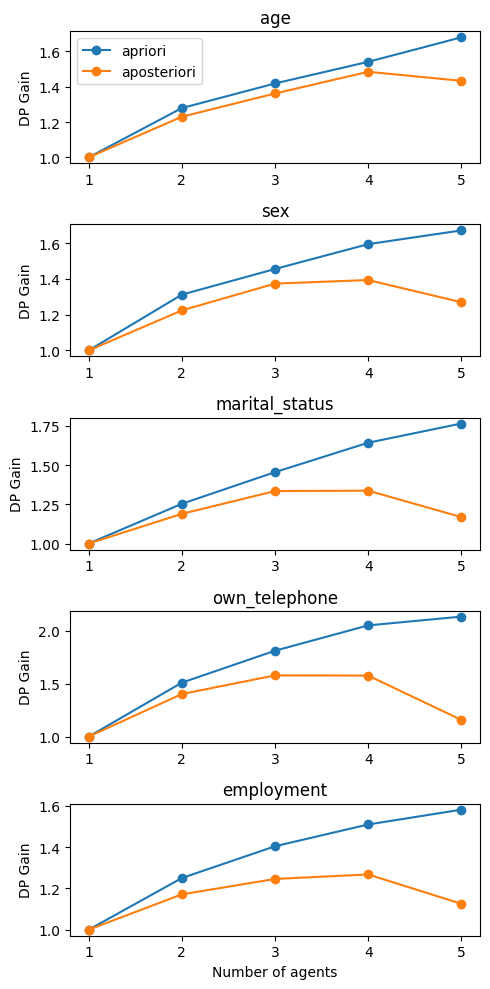

In [17]:
# create subplots (agents), show 2 strategies in same subplot
fig, axs = plt.subplots(n, 1, figsize=(5, 10))
for i in range(n):
    axs[i].plot(range(n), gain_ratio_aposteriori[i], 'o-', label='apriori')
    axs[i].plot(range(n), gain_ratio_apriori[i], 'o-', label='aposteriori')
    axs[i].set_title(f'{protected_attributes[i]}')
    axs[i].set_ylabel('DP Gain')
    axs[i].set_xticks(range(n))
    axs[i].set_xticklabels(list(range(1, n+1)))
    
axs[0].legend()
axs[n-1].set_xlabel('Number of agents')
plt.tight_layout()
# plt.savefig('../results/latest/german_credit_multicolab_gain.pdf', dpi=200)
